In [ ]:
# default_exp data.core 

In [ ]:
# hide
import sys

sys.path.append("..")
import pandas as pd

/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [ ]:
# hide
from nbdev.showdoc import *

# Data Core

> Using the fastai2 `Datasets` to make an time series dataset.

For now all is univerable but in the future I would also like to add multiplevariable. 


In [ ]:
from fastseq.core import *
from fastcore.all import *
from fastcore.imports import *
from fastai2.basics import *
from fastai2.data.transforms import *
from fastai2.tabular.core import *
from fastseq.data.load import *
from fastseq.data.core import *

torch.Size([1, 1020])
Train:41794; Valid: 1500; Test 300
81 1 tensor(-6.7800e-06)
82 7 tensor(0.)
84 5 tensor(0.)
85 3 tensor(0.)
86 15 tensor(0.)
89 3 tensor(5.2793e-07)
98 0 tensor(-2.5736e-05)
99 23 tensor(-0.0013)
100 6 tensor(-9.8028e-06)
102 5 tensor(0.0009)
109 5 tensor(-1.4505e-05)
112 9 tensor(2.2565e-06)
131 7 tensor(5.0664e-06)
242 7 tensor(4.2383e-06)
243 1 tensor(0.)
244 18 tensor(0.)
245 6 tensor(0.)
246 0 tensor(0.)
247 0 tensor(0.)
248 5 tensor(0.)


/home/tako/dev/env37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


455 11 tensor(-1.3281e-05)
315.25726 True 21


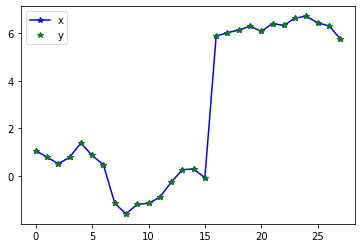

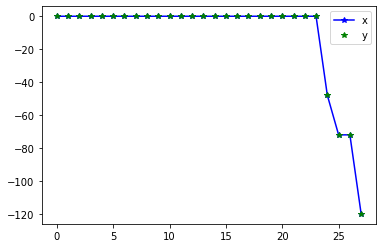

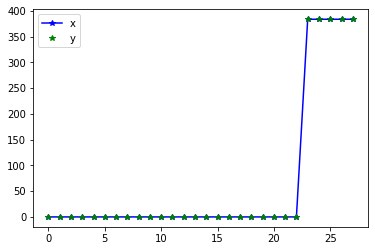

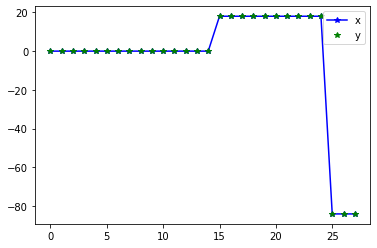

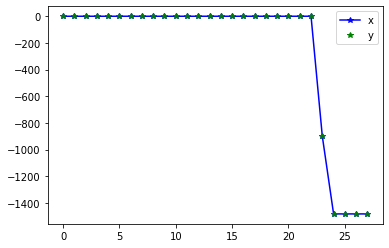

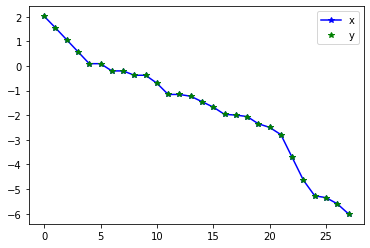

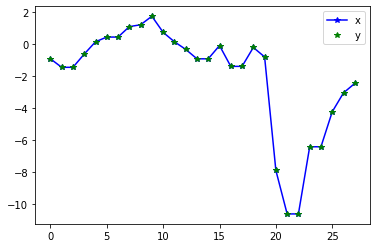

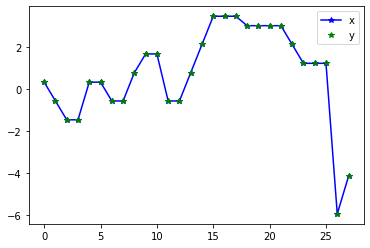

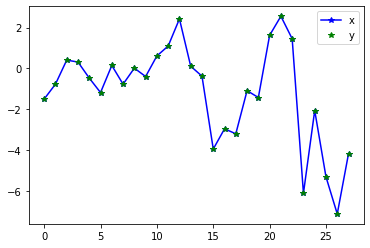

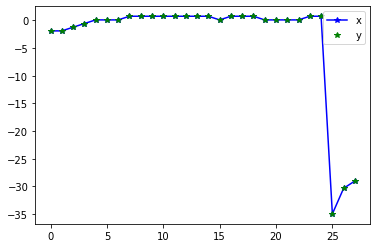

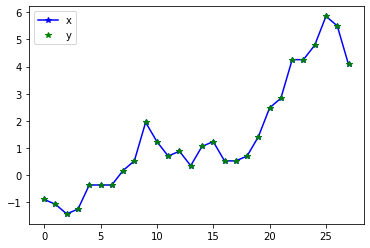

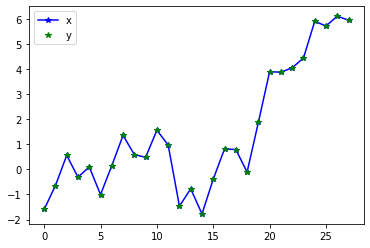

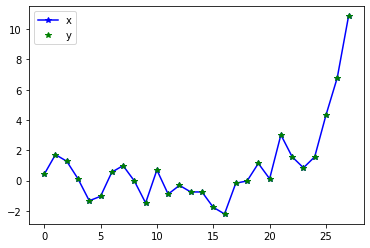

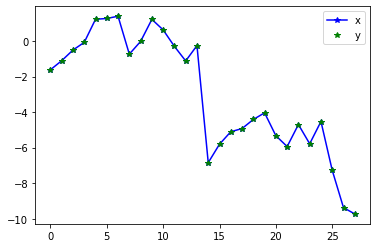

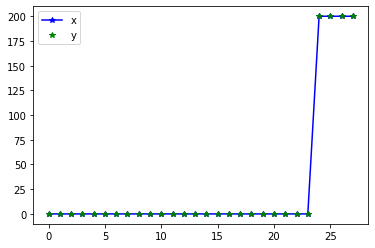

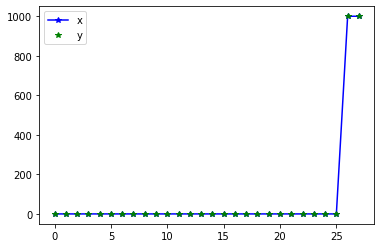

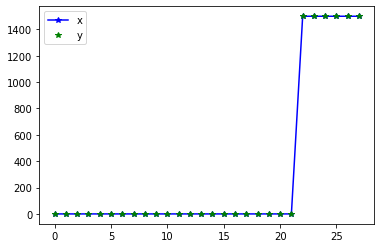

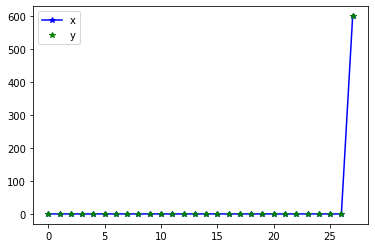

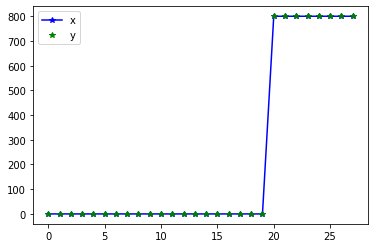

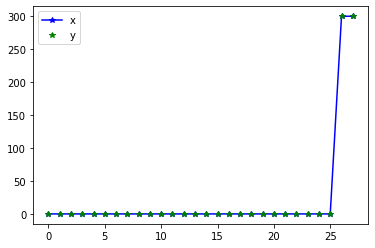

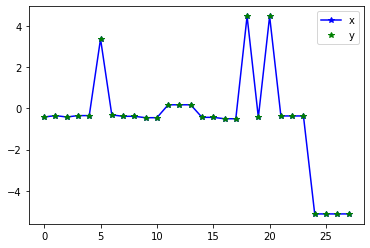

In [ ]:
norm = [True]
for _norm in norm:
    path = untar_data(URLs.m4_daily)
    dbunch = TSDataLoaders.from_folder(path, horizon = 14, lookback = 14, step=5, bs=64, nrows=300, norm=_norm, min_seq_len = 14, make_ones = True)
    out = 0
    dis = L()
    for i,o in enumerate(dbunch[0]):

        if o[1].std()>50:
            for _i in range(o[0].shape[0]):
                if (o[1][_i,:].std()/ o[0][_i,:].std())>2:
                    dis.append((o[1][_i,:].max()-o[1][_i,:].min()).cpu().numpy())
                    out+=1
                    f, ax = plt.subplots()
                    ax = TSTensorSeq(o[1][_i,:]).show(ax = ax)
                    TSTensorSeqy(o[1][_i,:]).show(ctx = ax)
                    print(i, _i, o[0][_i,:].mean())
                    break
#                     print(';'.join(L([o[1][_i,:].std().cpu().numpy(), o[0][_i,:].std().cpu().numpy(),(o[1][_i,:].max()-o[1][_i,:].min()).cpu().numpy()]).map(str) ))
                    

    print(np.mean(dis),_norm,out)

In [ ]:
df = pd.read_csv('/home/tako/dev/fastseq/data/airline-passengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
items = L([np.array(list(df['Passengers'].values))])
items

(#1) [array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])]

(1, 144)
Train:67; Valid: 19; Test 1


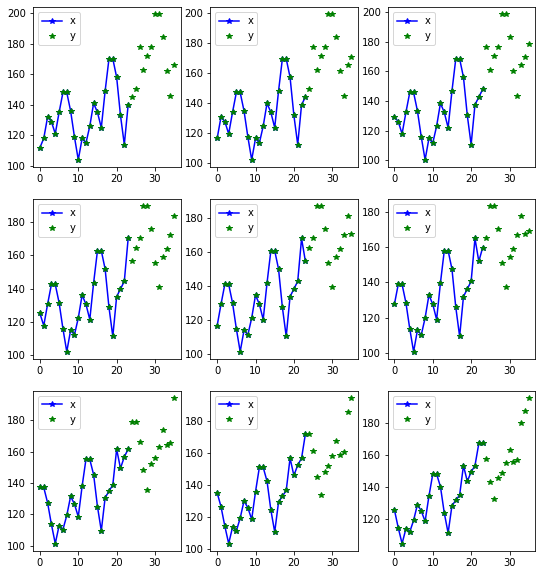

In [ ]:
dbunch = TSDataLoaders.from_items(items,lookback=24, horizon = 12, step=1, bs=64)
dbunch.show_batch()

In [ ]:
from fastseq.nbeats.learner import *

In [ ]:
learn = nbeats_learner(dbunch, )
learn.loss_func = F.mse_loss

In [ ]:
learn.fit(200,2e-2,cbs=ShowGraph)

epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.556670,1.074514,0.815739,1.218766,1.025566,2.731672,00:00
1,1.518349,1.044137,0.800423,1.200158,1.060911,2.746188,00:00
2,1.499322,1.084232,0.815806,1.190177,1.147172,2.789393,00:00
3,1.487522,1.057719,0.795893,1.170276,1.101171,2.860774,00:00
4,1.467061,1.015601,0.790304,1.192139,1.007726,2.871576,00:00
5,1.460419,0.996685,0.786445,1.220559,0.985219,2.790350,00:00
6,1.458469,0.928605,0.753435,1.174872,0.910926,2.759910,00:00
7,1.448823,0.926148,0.748087,1.159067,0.906296,2.733630,00:00
8,1.441851,0.954016,0.758525,1.176489,0.952901,2.680099,00:00
9,1.449062,1.189029,0.840160,1.239172,1.262914,2.788480,00:00


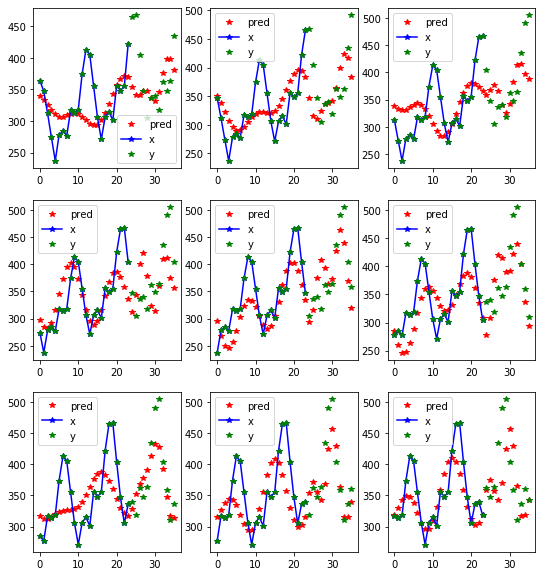

In [ ]:
learn.show_results()

In [ ]:
learn.n_beats_attention.means()

,trend0_0,trend0_1,seasonality1_0,seasonality1_1,seasonality1_2,seasonality1_3
theta_0_mean,0.12639208,0.17792621,0.4210527,-0.42105263,-1.2659652,1.2631575
theta_0_std,0.113579914,0.066040546,0.8377078,0.8377078,1.3605691,1.3679707
theta_1_mean,0.011554892,0.011017099,0.52779704,-0.49538392,0.09243496,0.30346876
theta_1_std,0.010124427,0.0098311985,0.5105611,0.49962983,0.27988264,0.48977247
theta_2_mean,0.001157895,0.0016838812,-0.53191185,-0.95373195,0.078947365,-0.06970427
theta_2_std,0.001384965,0.0007430193,1.4569715,1.5319239,0.3010702,0.4727859
att_mean,0.692053,0.741701,0.434581,0.420582,0.438653,0.688899
att_std,0.44772,0.432808,0.492285,0.479976,0.486542,0.448783
theta_3_mean,NaN,0.0001263147,NaN,-0.2254894,-0.21052605,1.2631413
theta_3_std,NaN,9.911805e-05,NaN,0.39788747,0.6306035,0.99117625
